# GAD-7 Data Exploration (by Ilya Tyagin)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<p></p>
<div class="toc"><ul class="toc-item"><li><span><a href="#GAD-7-Data-Exploration-(by-Ilya-Tyagin)" data-toc-modified-id="GAD-7-Data-Exploration-(by-Ilya-Tyagin)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>GAD-7 Data Exploration (by Ilya Tyagin)</a></span><ul class="toc-item"><li><span><a href="#Importing-libraries" data-toc-modified-id="Importing-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importing libraries</a></span></li><li><span><a href="#Reading-dataset" data-toc-modified-id="Reading-dataset-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Reading dataset</a></span></li><li><span><a href="#Data-representation" data-toc-modified-id="Data-representation-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data representation</a></span></li><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Data cleaning</a></span></li><li><span><a href="#Getting-some-information-about-patients" data-toc-modified-id="Getting-some-information-about-patients-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Getting some information about patients</a></span><ul class="toc-item"><li><span><a href="#Further-clinical-evaluation-recommendation" data-toc-modified-id="Further-clinical-evaluation-recommendation-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Further clinical evaluation recommendation</a></span></li><li><span><a href="#Distribution-of-the-number-of-observations" data-toc-modified-id="Distribution-of-the-number-of-observations-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Distribution of the number of observations</a></span></li><li><span><a href="#Distribution-of-treatment-duration" data-toc-modified-id="Distribution-of-treatment-duration-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>Distribution of treatment duration</a></span></li><li><span><a href="#Additional-data-filtering-step:-keep-only-patients-who-demonstrated-meaningful-involvement-in-testing-process" data-toc-modified-id="Additional-data-filtering-step:-keep-only-patients-who-demonstrated-meaningful-involvement-in-testing-process-1.5.4"><span class="toc-item-num">1.5.4&nbsp;&nbsp;</span>Additional data filtering step: keep only patients who demonstrated meaningful involvement in testing process</a></span></li><li><span><a href="#Relationship-between-treatment-duration-and-number-of-assessments-taken" data-toc-modified-id="Relationship-between-treatment-duration-and-number-of-assessments-taken-1.5.5"><span class="toc-item-num">1.5.5&nbsp;&nbsp;</span>Relationship between treatment duration and number of assessments taken</a></span></li><li><span><a href="#Patients-progress-during-the-treatment" data-toc-modified-id="Patients-progress-during-the-treatment-1.5.6"><span class="toc-item-num">1.5.6&nbsp;&nbsp;</span>Patients progress during the treatment</a></span></li><li><span><a href="#Outlier-detection" data-toc-modified-id="Outlier-detection-1.5.7"><span class="toc-item-num">1.5.7&nbsp;&nbsp;</span>Outlier detection</a></span></li><li><span><a href="#Comparison-of-scores-between-first-and-last-GAD-7-assessments" data-toc-modified-id="Comparison-of-scores-between-first-and-last-GAD-7-assessments-1.5.8"><span class="toc-item-num">1.5.8&nbsp;&nbsp;</span>Comparison of scores between first and last GAD-7 assessments</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Summary</a></span></li></ul></li></ul></div>

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import pearsonr

plt.rc('figure', figsize=(15.0, 10.0))
pd.set_option('display.max_colwidth', None)

## Reading dataset

In [2]:
## Dataset is expected to be in the same directory as the notebook

phq_df = pd.read_csv('phq_all_final.csv')

In [3]:
phq_df.head()

,date,patient_id,type,patient_date_created,score
0,2019-08-26T13:32:43.019162,8430,gad7,2019-06-03T13:23:02.63568,6
1,2019-11-15T17:55:11.364877,8430,gad7,2019-06-03T13:23:02.63568,1
2,2019-10-07T18:23:29.611351,14338,gad7,2019-06-03T13:32:30.66846,10
3,2019-11-04T20:16:28.610965,14338,gad7,2019-06-03T13:32:30.66846,7
4,2019-12-02T20:56:55.966354,14338,gad7,2019-06-03T13:32:30.66846,9


In [4]:
phq_df['date'] = phq_df['date'].astype(np.datetime64)
phq_df['patient_date_created'] = phq_df['patient_date_created'].astype(np.datetime64)

In [5]:
phq_df['type'].drop_duplicates()

0    gad7
Name: type, dtype: object

`type` column does not contain any useful information, so we can drop it:

In [6]:
phq_df = phq_df.drop(columns='type')

phq_df

,date,patient_id,patient_date_created,score
0,2019-08-26 13:32:43.019162,8430,2019-06-03 13:23:02.635680,6
1,2019-11-15 17:55:11.364877,8430,2019-06-03 13:23:02.635680,1
2,2019-10-07 18:23:29.611351,14338,2019-06-03 13:32:30.668460,10
3,2019-11-04 20:16:28.610965,14338,2019-06-03 13:32:30.668460,7
4,2019-12-02 20:56:55.966354,14338,2019-06-03 13:32:30.668460,9
...,...,...,...,...
53693,2020-07-31 13:59:13.201741,10683,2020-07-31 13:54:20.164253,1
53694,2020-07-31 15:08:56.079027,12344,2020-07-31 15:06:51.043730,1
53695,2020-07-31 15:52:50.353265,17475,2020-07-31 15:40:07.726529,7
53696,2020-07-31 17:36:57.057913,9069,2020-07-31 17:33:27.096572,3


Make sure that `patient_date_created` is unique for each `patient_id`:

In [7]:
len(phq_df['patient_id'].drop_duplicates()) == \
len(phq_df['patient_date_created'].drop_duplicates())

True

## Data representation

If each point in time from `date` column represents a GAD-7 assessment taken by a patient with unique `patient_id`, it means that the dataset shows time series of observations for each patient.

In other words, if we group the data by `patient_id`, we obtain a list of pairs (`date`, `score`), which we will process later. To illustrate the idea, let's perform a quick aggregation:

In [8]:
phq_aggregated_df = \
    phq_df \
        .groupby(['patient_id', 'patient_date_created']) \
        .agg(list) \
        .reset_index().set_index('patient_id')
phq_aggregated_df.head()

,patient_date_created,date,score
patient_id,,,
0,2019-12-04 16:21:58.994188,"[2019-12-31 18:35:09.063829, 2020-01-29 19:45:42.206085, 2020-02-26 19:44:31.516123, 2020-03-27 18:25:25.588107, 2020-04-24 18:47:01.412846, 2020-05-22 18:38:29.559676]","[1, 0, 0, 0, 1, 1]"
1,2020-01-21 23:29:16.740718,"[2020-04-05 18:08:24.749997, 2020-04-11 05:10:14.684719]","[10, 11]"
2,2020-04-08 17:26:42.952071,"[2020-05-10 18:15:16.919307, 2020-06-11 22:57:48.000646, 2020-07-09 22:41:48.464082]","[16, 11, 11]"
3,2020-03-24 15:41:13.422548,[2020-07-15 15:30:15.133561],[5]
4,2020-06-05 14:00:19.294641,[2020-07-02 22:21:30.734098],[13]


In [9]:
patients_cohort_size = len(phq_aggregated_df)
patients_cohort_size

15502

To begin with, let's perform some data cleaning.

## Data cleaning

From the description of GAD-7 assessment we know that this test: 
> asks how often one has been bothered by the problems represented in each question _over the last two weeks_

Thus, if we observe that there were 2 consecutive observations, which were taken in a small period of time (say, same day), we need to filter out one of them. From the experience of dealing with online tests, I can say that sometimes a person can fill out the assessment form wrong, then realize it after some time and submit again. 

So the idea would be to check every pair of consecutive timestamps, and if the time difference between them is less then _timeframe_ days, keep more recent one of the pair.

For that we write `Filter_close_observations` function:

In [10]:
def Filter_close_observations(
    record:pd.Series,
    timeframe:int = 2, # minimal allowed timeframe width
) -> np.array:
    
    """"
    Performs a very basic filtering of a series of GAD-7 scores.
    """
    
    timestamps = record['date']
    starting_date = record['patient_date_created']
    
    values_mask = np.ones(
        len(timestamps),
        dtype=np.bool,
    )
    for idx in range(len(timestamps) - 1):
        interval_between_observations = (timestamps[idx+1] - timestamps[idx]).days
        if interval_between_observations < timeframe:
            values_mask[idx] = 0
    
    return values_mask

Let's see how it works.

For example, we have patient with `patient_id` = 18400, let's see when his/her tests were taken:

In [11]:
list(enumerate(
    tuple(zip(phq_aggregated_df.loc[18400]['date'], phq_aggregated_df.loc[18400]['score']))
))

[(0, (Timestamp('2019-10-25 12:22:11.743787'), 1)),
 (1, (Timestamp('2019-12-20 13:08:12.641000'), 1)),
 (2, (Timestamp('2020-02-14 14:16:22.136018'), 2)),
 (3, (Timestamp('2020-02-14 14:21:35.770522'), 4)),
 (4, (Timestamp('2020-03-13 12:16:45.105485'), 2))]

We can see that observations 2 and 3 were taken in the same day.

So, if we apply `Filter_close_observations` function, we'll get:

In [12]:
filtering_mask = Filter_close_observations(phq_aggregated_df.loc[18400])

filtered_dates = np.array(phq_aggregated_df.loc[18400]['date'])[filtering_mask]
filtered_timestamps = np.array(phq_aggregated_df.loc[18400]['score'])[filtering_mask]

list(enumerate(
    tuple(zip(filtered_dates, filtered_timestamps))
))

[(0, (Timestamp('2019-10-25 12:22:11.743787'), 1)),
 (1, (Timestamp('2019-12-20 13:08:12.641000'), 1)),
 (2, (Timestamp('2020-02-14 14:21:35.770522'), 4)),
 (3, (Timestamp('2020-03-13 12:16:45.105485'), 2))]

As a result, GAD-7 test taken at `2020-02-14 14:16:22.136018` was filtered out because there was another test at `2020-02-14 14:21:35.770522`, which was (supposedly) retaken 5 minutes later, so we keep only the latter from this pair.

Now we can apply this function to the entire dataset:

In [13]:
phq_aggregated_df['filtering_mask'] = \
    phq_aggregated_df.apply(Filter_close_observations, axis=1)

In [14]:
phq_aggregated_df['date'] = phq_aggregated_df \
    .apply(lambda x: np.array(x['date'])[x['filtering_mask']], axis=1)

phq_aggregated_df['score'] = phq_aggregated_df \
    .apply(lambda x: np.array(x['score'])[x['filtering_mask']], axis=1)

We can also show how many values were filtered out:

In [15]:
raw_record_count = len(phq_df)

filtered_records_count = phq_aggregated_df['filtering_mask'].apply(np.sum).sum()

print(f'Values before filtering: {raw_record_count}')
print(f'Values after filtering: {filtered_records_count}')
print(f'Filtered out: {round(100*(1 - filtered_records_count/raw_record_count), 5)}% of records')

Values before filtering: 53698
Values after filtering: 49910
Filtered out: 7.05427% of records


## Getting some information about patients

### Further clinical evaluation recommendation

According to the provided description, we know that if a patient obtained score of 10 or greater, further clinical evaluation is recommended. Thus, we can find patients who obtained score of 10 or greated at least once and put the result in `needs_clinical_eval` column:

In [16]:
phq_aggregated_df['needs_clinical_eval'] = \
    phq_aggregated_df['score'].apply(lambda x: max(x) >=10)

In [17]:
print(
    '''Patients recommended to get a further clinical evaluation: '''
    f'''{
            phq_aggregated_df['needs_clinical_eval'].sum()
        } ({
            round(100*phq_aggregated_df['needs_clinical_eval'].sum()/
            len(phq_aggregated_df), 2)
            }%)'''
)

Patients recommended to get a further clinical evaluation: 4402 (28.4%)


### Distribution of the number of observations

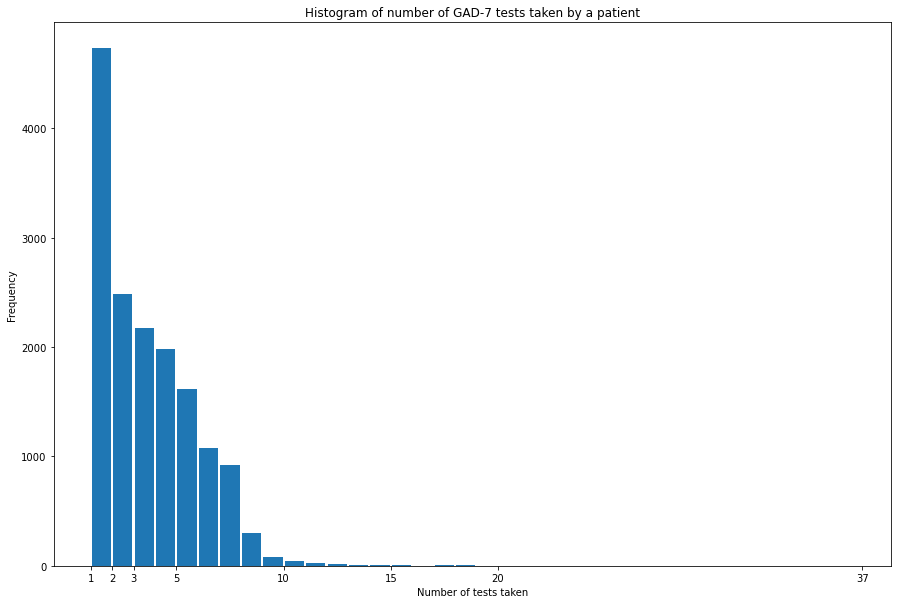

In [18]:
num_observations = phq_aggregated_df['date'].apply(len)
hist_bins = [1,2,3,5,10,15,20,max(num_observations)]

plt.title('Histogram of number of GAD-7 tests taken by a patient')
plt.xlabel('Number of tests taken')
plt.xticks(hist_bins)
num_observations \
    .plot \
    .hist(
        bins=num_observations.drop_duplicates().sort_values(),
        rwidth=0.9,
    )
plt.show()

In [19]:
print(f" Average number of assessments taken: {round(num_observations.mean(), 2)}")

 Average number of assessments taken: 3.22


### Distribution of treatment duration

To understand how long a treatment takes for each patient, we can plot a treatment duration histogram:

In [20]:
treatment_length = phq_aggregated_df.apply(
    lambda x: \
        (x['date'][-1] - x['patient_date_created']).days,
    axis=1,
)
phq_aggregated_df['treatment_duration'] = treatment_length

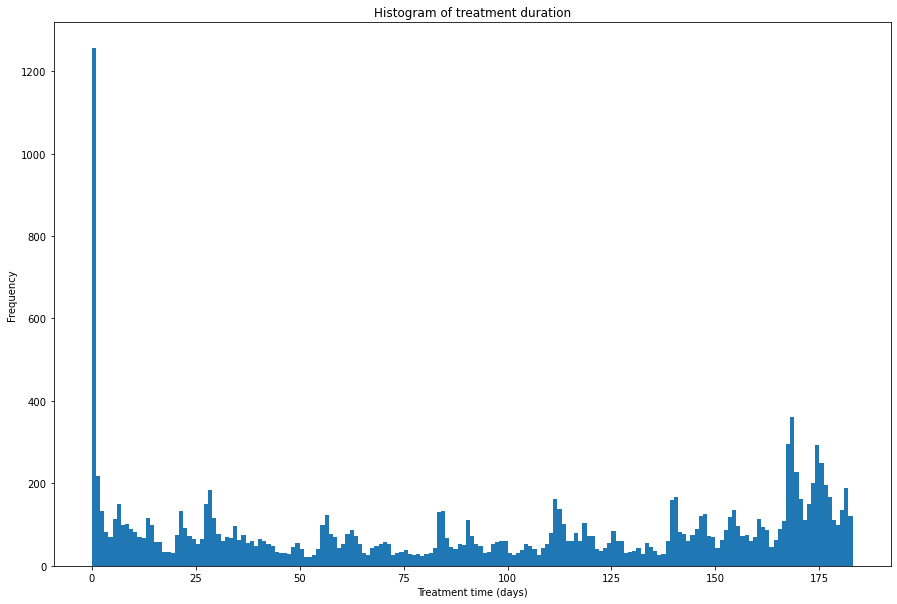

In [21]:
plt.title('Histogram of treatment duration')
plt.xlabel('Treatment time (days)')
(treatment_length) \
    .plot \
    .hist(
        bins=(treatment_length).drop_duplicates().sort_values(),
    )
plt.show()

### Additional data filtering step: keep only patients who demonstrated meaningful involvement in testing process

From these histograms we can see that a lot of patients did not perform their GAD-7 assessments in a timely manner/did not receive treatment, thus their score results cannot really show how effective the treatment is. The same thing comes to the number of observations. 

It would be better to filter out the patients whose treatment time (`treatment_length`) or number of observations (`num_observations`) is less than some threshold. For demonstration purposes let's set:
* `treatment_length` threshold at 14 days
* `num_observations` threshold at 3 assessments

In [22]:
treatment_length_threshold = 14
num_observations_threshold = 3

phq_aggregated_df = \
    phq_aggregated_df[
        ~(
            (treatment_length < treatment_length_threshold) | \
            (num_observations < num_observations_threshold))
    ]
phq_aggregated_df

,patient_date_created,date,score,filtering_mask,needs_clinical_eval,treatment_duration
patient_id,,,,,,
0,2019-12-04 16:21:58.994188,"[2019-12-31 18:35:09.063829, 2020-01-29 19:45:42.206085, 2020-02-26 19:44:31.516123, 2020-03-27 18:25:25.588107, 2020-04-24 18:47:01.412846, 2020-05-22 18:38:29.559676]","[1, 0, 0, 0, 1, 1]","[True, True, True, True, True, True]",False,170
2,2020-04-08 17:26:42.952071,"[2020-05-10 18:15:16.919307, 2020-06-11 22:57:48.000646, 2020-07-09 22:41:48.464082]","[16, 11, 11]","[True, True, True]",True,92
8,2019-12-09 16:15:50.552521,"[2019-12-19 13:50:25.195408, 2020-01-26 03:10:13.998682, 2020-03-20 01:51:17.615135, 2020-05-11 02:43:24.006108]","[4, 8, 7, 8]","[True, True, True, True]",False,153
11,2019-12-11 14:12:59.191996,"[2019-12-11 20:43:07.693584, 2020-01-08 13:41:41.393185, 2020-02-05 15:29:02.675840, 2020-03-05 12:04:39.780997, 2020-03-25 12:24:53.825145, 2020-04-01 11:52:49.834114, 2020-04-20 19:41:34.420126, 2020-05-08 17:39:28.788287]","[2, 0, 6, 0, 0, 3, 2, 0]","[True, True, True, True, True, True, True, True]",False,149
12,2019-10-16 14:54:48.114265,"[2019-10-23 19:34:39.823810, 2019-11-14 21:17:27.921790, 2019-12-18 13:42:21.443605, 2020-01-13 22:54:53.273016, 2020-02-18 22:52:36.327266]","[4, 2, 3, 4, 2]","[True, True, True, True, True]",False,125
...,...,...,...,...,...,...
18391,2019-09-04 20:03:05.678550,"[2019-10-09 15:11:11.988576, 2019-11-06 15:10:42.360805, 2019-12-04 15:37:45.338947, 2020-01-03 16:40:51.137329, 2020-01-29 14:01:48.150438, 2020-02-26 15:09:52.406315]","[5, 0, 2, 2, 2, 3]","[False, True, True, True, True, True, True]",False,174
18392,2019-12-13 18:12:27.931602,"[2019-12-18 22:09:13.927837, 2020-01-18 05:08:49.550493, 2020-03-12 17:21:37.950633, 2020-04-14 03:13:20.670711]","[12, 6, 11, 12]","[True, True, True, True]",True,122
18395,2020-02-12 18:31:59.525394,"[2020-04-01 13:01:32.084678, 2020-05-28 13:58:53.638007, 2020-07-02 13:16:49.979076]","[0, 0, 0]","[True, True, True]",False,140


In [23]:
n_filtered_patients = patients_cohort_size - len(phq_aggregated_df)
print(
    f'''Filtered out: {
        n_filtered_patients
    } patient records ({
        round(100*n_filtered_patients/patients_cohort_size, 1)
    })%'''
)

Filtered out: 7221 patient records (46.6)%


After cleaning let's take a look at the same data again:

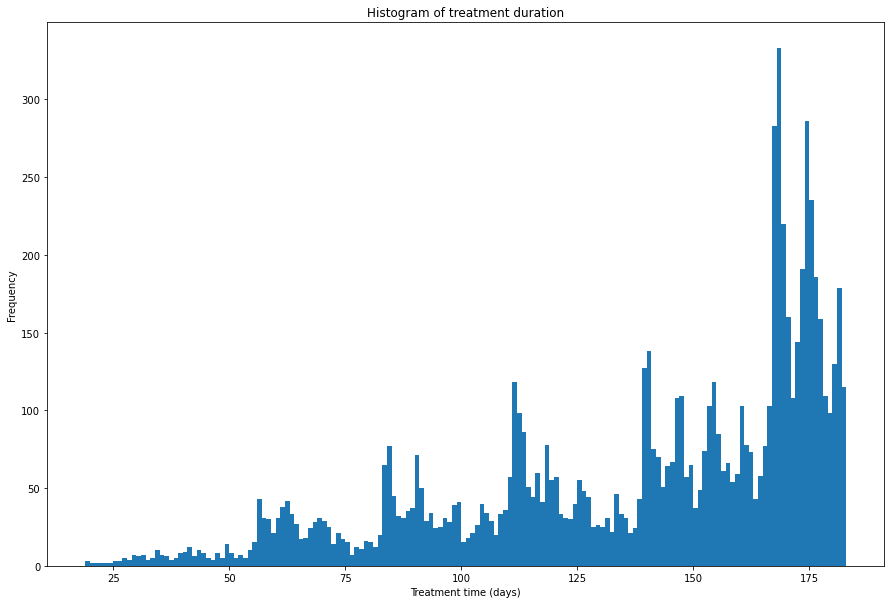

In [24]:
plt.title('Histogram of treatment duration')
plt.xlabel('Treatment time (days)')
phq_aggregated_df['treatment_duration'] \
    .plot \
    .hist(
        bins=phq_aggregated_df['treatment_duration'].drop_duplicates().sort_values(),
    )
plt.show()

In [25]:
num_observations = phq_aggregated_df['date'].apply(len)
print(
    f"Average number of assessments taken: {round(num_observations.mean(),2)}"
)

Average number of assessments taken: 4.85


In [26]:
print(f"Average treatment length: {round((phq_aggregated_df['treatment_duration'].mean()/30), 2)} months")

Average treatment length: 4.61 months


### Relationship between treatment duration and number of assessments taken

It would be interesting to check how treatment duration and number of taken assessments are related to each other. For that we can calculate pearson correlation and check whether or not the hypothesis of these 2 features being related is valid:

In [27]:
pearson_coef, p_value = pearsonr(
    phq_aggregated_df['treatment_duration'],
    phq_aggregated_df['date'].apply(len),
)

print(
    f'Pearson correlation coefficient: {pearson_coef} \n'
    f'p-value: {p_value}'
)

Pearson correlation coefficient: 0.4582893075882659 
p-value: 0.0


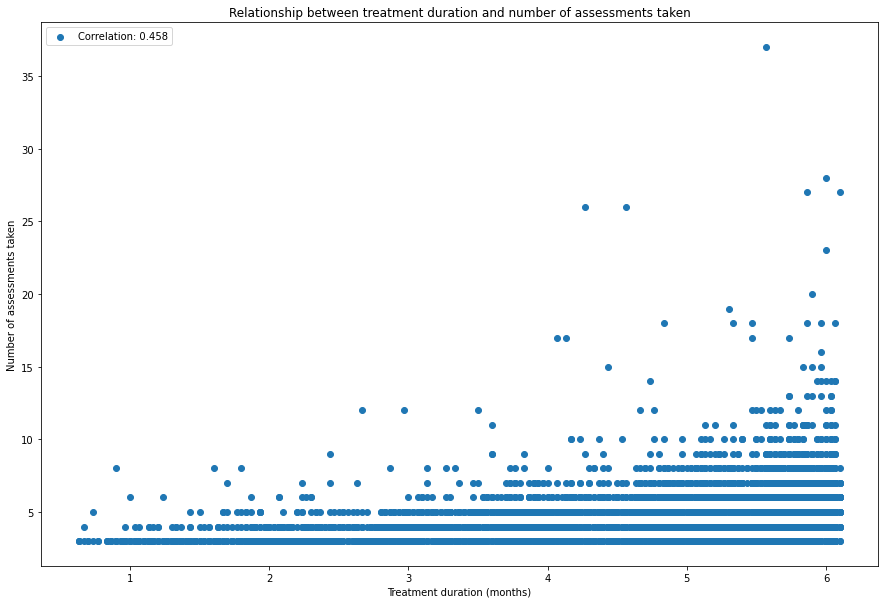

In [28]:
plt.title('Relationship between treatment duration and number of assessments taken')
plt.xlabel('Treatment duration (months)')
plt.ylabel('Number of assessments taken')
plt.scatter(
    phq_aggregated_df['treatment_duration']/30,
    phq_aggregated_df['date'].apply(len),
)
plt.legend(
    [f'Correlation: {round(pearson_coef, 3)}'],
    loc='upper left'
)
plt.show()

Value of ~0.46 indicates that there is a noticeable correlation between treatment length and number of assessments.

P-value of 0 means that this result is statistically significant.

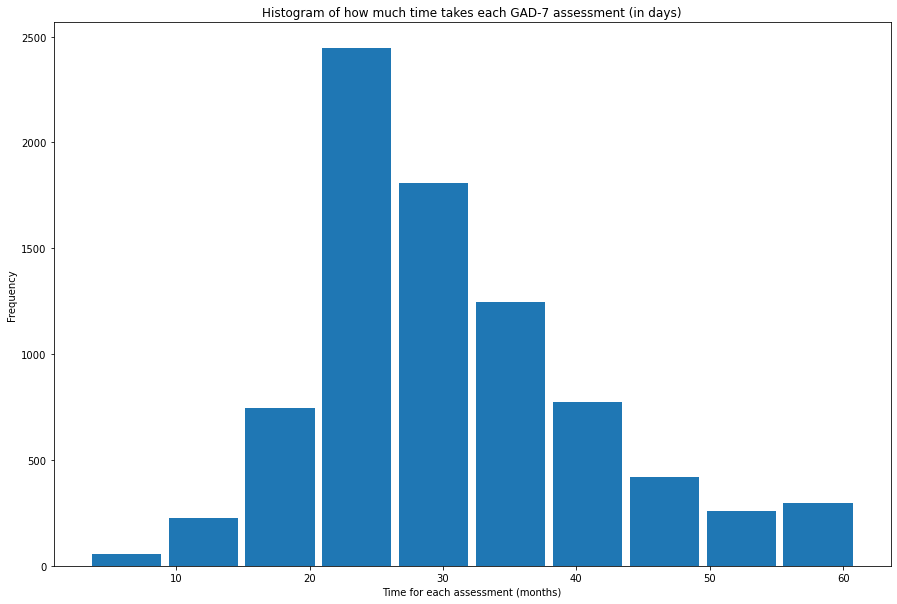

In [29]:
plt.xlabel('Time for each assessment (months)')
plt.title('Histogram of how much time takes each GAD-7 assessment (in days)')
assessment_regularity = (
    phq_aggregated_df['treatment_duration']/phq_aggregated_df['date'].apply(len)
)

assessment_regularity \
    .plot \
    .hist(
        rwidth=0.9,
    )
plt.show()

In [30]:
print(
    f'Each GAD-7 test takes (on average): {int(assessment_regularity.mean())} days'
)

Each GAD-7 test takes (on average): 30 days


### Patients progress during the treatment

For each patient we can get the information of how good was his/her progress during the treatment.

For that we can use linear model.
Basically, we fit a line on a 2d plane, where

* $x$ axis - time 

* $y$ axis - GAD-7 score

The slope of the line would indicate the patient progress during treatment (score change per time unit).

Let's demonstrate it:

In [31]:
test_record = phq_aggregated_df.loc[18391]

x = [
    (timestamp - test_record['patient_date_created']).days/30 
    for timestamp in test_record['date']
]
y = test_record['score']

$x$ axis now represents the number of days since the patient was created (I assume this is when the treatment started)

$y$ axis represents the GAD-7 scores

In [32]:
print(f'x axis (months):{[round(val, 3) for val in x]}\ny axis (score) :{y}')

x axis (months):[1.133, 2.067, 3.0, 4.0, 4.867, 5.8]
y axis (score) :[5 0 2 2 2 3]


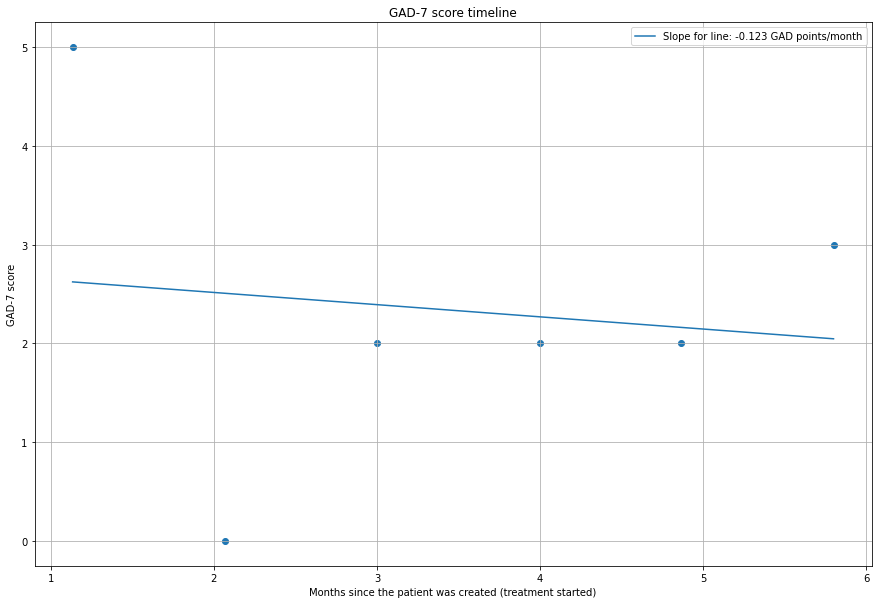

In [33]:
progress_linefit = np.polyfit(x,y, 1)
progress_poly1d = np.poly1d(progress_linefit)
plt.scatter(x, y)
plt.plot(x, progress_poly1d(x))
plt.xlabel('Months since the patient was created (treatment started)')
plt.ylabel('GAD-7 score')
plt.title('GAD-7 score timeline')
plt.grid()
plt.legend(
    [f'Slope for line: {round(progress_linefit[0], 3)} GAD points/month'],
    loc = 'upper right'
)
plt.show()

We can see that for the patient we took randomly the slope is negative, which means that treatment showed positive effect.

Now we can write a simple function `Calculate_patient_progress` and get these values for all patients:

In [34]:
def Calculate_patient_progress(
    record: pd.Series,
):
    """
    Calculates the linear approximation of treatment effect.
    Positive number indicates the GAD-7 score increasing, which is supposed to have negative overall effect.
    
    Units:
        GAD-7 score change per month
    """
    
    x = [
        (timestamp - record['patient_date_created']).days for timestamp in record['date']
    ]
    y = record['score']
    
    # we want an assesment to be at least 14 days long to make observations more representative 
    if (max(y) < 0.01) or (x[-1] - x[0]) < 14:
        return 0.0
    x = [timestamp/30 for timestamp in x]
    
    return np.polyfit(x, y, 1)[0]


In [35]:
phq_aggregated_df['lin_score_change'] = \
    phq_aggregated_df.apply(
        Calculate_patient_progress,
        axis=1,
    )

Now we can investigate how these monthly score changes are distributed:

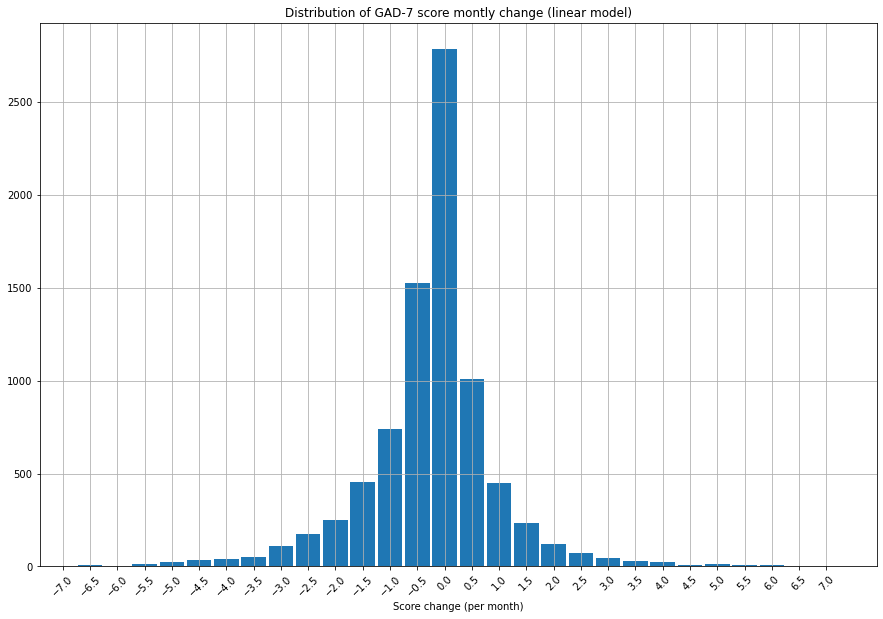

In [36]:
range_var = 7
granularity = 4
hist_bins = \
    np.linspace(-range_var, range_var, num=range_var*granularity+1)

plt.xticks(hist_bins, rotation=45)
plt.xlabel('Score change (per month)')
plt.title('Distribution of GAD-7 score montly change (linear model)')
phq_aggregated_df['lin_score_change'] \
    .hist(
        #log=True,
        bins=hist_bins+1/granularity,
        rwidth=0.9,
    )
plt.show()

In [37]:
print(
f'''Avg score change: {phq_aggregated_df['lin_score_change'].mean()} (GAD-7 points per month)
Patients with positive dynamics: {len(phq_aggregated_df[phq_aggregated_df['lin_score_change'] < 0])}
Patients with negative dynamics: {len(phq_aggregated_df[phq_aggregated_df['lin_score_change'] > 0])}
Patients with no dynamics: {len(phq_aggregated_df[phq_aggregated_df['lin_score_change'] == 0])}
''')

Avg score change: -0.24977626941847217 (GAD-7 points per month)
Patients with positive dynamics: 4790
Patients with negative dynamics: 3209
Patients with no dynamics: 282



### Outlier detection

If we have enough observations (I would say, at least 4 since the data is quite sparse and not always consistent), we could try to detect outliers in the scores.
Outliers can be a result of the following events:
1) a patient made a mistake during the assessment
2) a fact that GAD-7 was filled out correctly and over the last 2 weeks a patient was having significant anxiety severity change which can be investigated further.

We tried to eliminate events of the 1st type performing data cleaning step, but errors are still possible.

We can use mean score value as a naive estimator, and if a specific value is greather than $\alpha$ * mean + std, we say it is an outlier. Mathematically, we say that measurement $m_i$ from a series of measurements $m$ is an outlier if:

$$|m_i| > \mu + \alpha * \sqrt{\frac{\Sigma_i(m_i - \mu)^2}{N}}$$

where $\mu$ - mean value score across all the observations for a specific patient, $N$ - number of observations, $\alpha$ describes the outlier tolerance. $\alpha$ was set to 2.5, but the value can be changed if needed.

In [38]:
alpha = 2.5

def Find_outliers(
    record:pd.Series, 
    alpha:float=alpha,
):
    """
    Finds outlier GAD-7 scores. Sensitivity can be adjusted with alpha parameter.
    """
    
    if len(record) < 4:
        return np.NaN
    
    mean_val = np.mean(record)
    std = np.std(record)
    
    outlier_index = (abs(record - mean_val) > alpha * std)
    outlier_position = outlier_index.nonzero()
    
    outlier_values = []
    
    for pos in outlier_position[0]:
        outlier_values.append(record[pos])
    
    return np.array(outlier_values) if len(outlier_values) else np.NaN

In [39]:
phq_aggregated_df['outlier_scores'] = \
    phq_aggregated_df['score'].apply(Find_outliers)

In [40]:
outliers_percent = \
    len(phq_aggregated_df[~phq_aggregated_df['outlier_scores'].isna()])/ \
    len(phq_aggregated_df)
print(
    f'''Patients with outlier scores: {
        len(phq_aggregated_df[~phq_aggregated_df['outlier_scores'].isna()])
    } ({round(100*outliers_percent, 3)}%)''')

Patients with outlier scores: 50 (0.604%)


To illustrate how outlier detection works let's check some patient records with outlier results:

In [41]:
phq_aggregated_df[['score', 'outlier_scores']] \
    [~phq_aggregated_df['outlier_scores'].isna()].sample(3)

,score,outlier_scores
patient_id,,
584,"[10, 5, 4, 3, 3, 4, 3, 0, 0, 4, 0, 4, 1, 3, 3, 3, 2]",[10]
2462,"[2, 1, 0, 5, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1]",[5]
748,"[11, 0, 0, 0, 0, 0, 0, 0]",[11]


### Comparison of scores between first and last GAD-7 assessments

To check the overall treatment effect we can also compare score distributions on the first and last GAD-7 assessments:

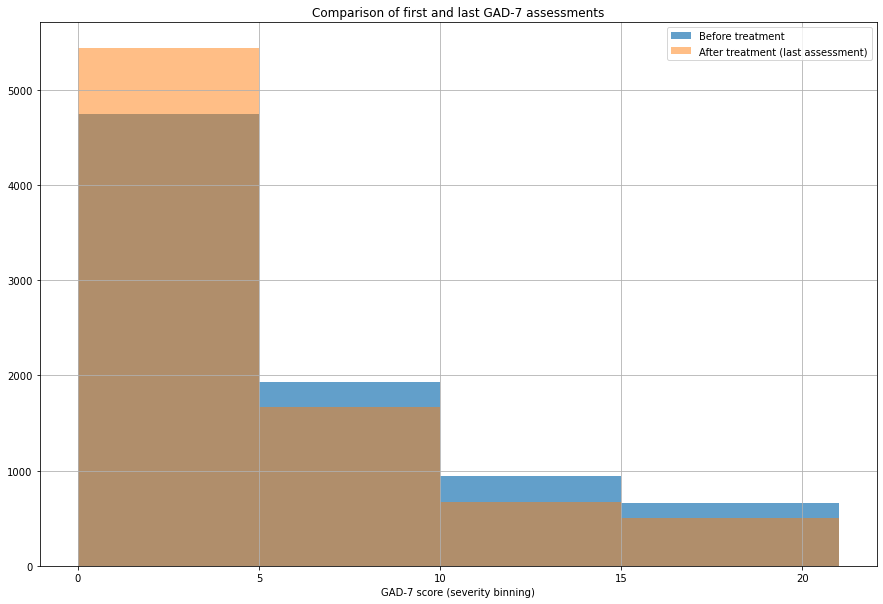

In [42]:
phq_start_score = phq_aggregated_df['score'].apply(lambda x: x[0])
hist_bins = [0,5,10,15,21]

plt.xlabel('GAD-7 score (severity binning)')
plt.title('Comparison of first and last GAD-7 assessments')
phq_start_score.hist(
    alpha = 0.7, 
    label='Before treatment',
    bins=hist_bins,
)

phq_end_score = phq_aggregated_df['score'].apply(lambda x: x[-1])

phq_end_score.hist(
    alpha = 0.5, 
    label='After treatment (last assessment)',
    bins=hist_bins,
)
plt.legend(loc='upper right')
plt.show()

It is clearly seen that last assessment scores distribution (orange) is significantly more skewed towards lower values (low to minimal severity level) than the scores distribution before treatment.

We can also take a look at how GAD-7 score difference is distributed (last - first assessment):

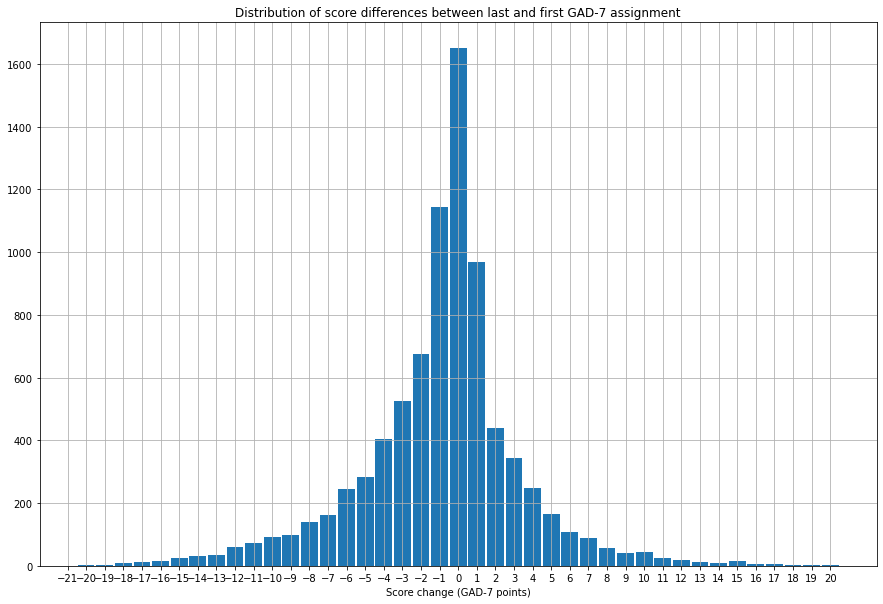

In [43]:
plt.title('Distribution of score differences between last and first GAD-7 assignment')
plt.xlabel('Score change (GAD-7 points)')
plt.xticks((phq_end_score - phq_start_score).drop_duplicates().sort_values())
(phq_end_score - phq_start_score).hist(
    rwidth=0.9,
    bins=0.5+(phq_end_score - phq_start_score).drop_duplicates().sort_values(),
)
plt.show()

In [44]:
print(
    f'Avg score at the beginning of the treatment: {phq_start_score.mean()}\n'
    f'Avg score at the end of the treatment: {phq_end_score.mean()}\n'
    f'Avg score change {(phq_end_score - phq_start_score).mean()}'
)

Avg score at the beginning of the treatment: 5.100953991063881
Avg score at the end of the treatment: 4.16857867407318
Avg score change -0.9323753169907016


Additionally, We can estimate how many patients with initial GAD-7 scores $\geq$10 changed their severity status from Moderate or Severe to Mild or Minimal:

In [45]:
n_patients_with_initially_severe_status = sum(phq_start_score >= 10)
n_patients_with_after_treatment_severe_status = sum(phq_end_score >= 10)
n_severe_patients_positive_change = \
    n_patients_with_initially_severe_status - \
    n_patients_with_after_treatment_severe_status

In [46]:
print(
    f'{n_severe_patients_positive_change} '
    'patients with initially Moderate/Severe status changed their status to Mild/Minimal, '
    f'which is {round(100*n_severe_patients_positive_change/n_patients_with_initially_severe_status, 3)}% '
    f'of all patients initially Moderate/Severe with status ({n_patients_with_initially_severe_status})'
)

433 patients with initially Moderate/Severe status changed their status to Mild/Minimal, which is 26.961% of all patients initially Moderate/Severe with status (1606)


## Summary

_Data cleaning and filtering_

* During the initial data cleaning (based on the assessment error assumption, check <a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-1.4"><span class="toc-item-num"></span>Data cleaning</a> for details) around 7% (3788 from 53698) of the records were filtered out.
* A quick analysis of assessments histograms showed that many patients did not perform their GAD-7 assessments in a timely manner, thus these patients were excluded from the analysis as not representative. Filtering parameters (treatment duration and number of tests taken) can be adjusted and all the values will be therefore recalculated.
  * For the contemporary analysis the following threshold values were used:
    * minimum treatment duration: 14 days
    * minimum number of taken assessments: 3 assessments

  * 46.6% patient records were filtered out (7221 from 15502)

_Assessments analysis_

* Analysis of data quality showed that there is a noticeable (~0.46) correlation between treatment length (in time units) and number of assessments, which confirms that the relationhsip:
_longer treatment period - more assessments taken_ is valid

* On average, assessments were taken once a month (or: time needed for an assessment completion is around a month).

* Average treatment time: 4.6 months

* Average number of tests for each patient: 4.85

_Treatment effectiveness analysis_

We showed that the treatment has an __overall positive effect__ (according to GAD-7 assessment scores) with the following methods:
* Linear modeling of patients progress (GAD-7 score change per month) (avg 0.25 point/month improvement)
  * Patients with positive dynamics: 4796
  * Patients with negative dynamics: 3201
  * Patients with no dynamics: 284
  * Patients whose data was not evaluated: 7221
* Comparison between GAD-7 initial scores and GAD-7 last obtained scores (avg 0.93 point improvement)

For patients who are recommended additional clinical evaluation (based on their initial GAD-7 score $\geq$ 10): 
* 1606 patients had initial GAD-7 score $\geq$ 10. After treatment the number of patients with GAD-7 score $\geq$ 10 was reduced to 1173, which means that 433 patients (or 26.96%) changed their severity status from Moderate or Severe to Mild or Minimal

_Some additional information about patients_

* Number of patients in the dataset (total): 15502

* 4402 patients (from 15502) are recommended to get a clinical evaluation (based on their max GAD-7 score) 

* 50 patients have at least one unusual (outlier) test score, which can also be checked. This number can vary based on detection sensitivity paramether $\alpha$ (Details can be found in <a href="#Outlier-detection" data-toc-modified-id="Outlier-detection-1.5.6"><span class="toc-item-num"></span>Outlier detection section</a>)